In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from logistic_regression.Logit import Lg
from sklearn.datasets.samples_generator import make_classification
from deal_data_pre.deal_model import *

c:\users\86158\desktop\python安装包\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


# make_classification  

sklearn中制造用于分类数据的模块

* 参数

  n_samples样本数量
  
  n_features特征数量
  
  n_redundant冗余功能的数量
  
   n_clusters_per_class每个类的簇数。
   
   n_classes类别数量

In [2]:
X, y = make_classification(n_samples=10000, n_features=340, n_redundant=0,
                             n_clusters_per_class=1, n_classes=2, random_state=40)

In [3]:
L = Lg()
L.fit(X, y)
pre_result = L.predict(X)

# 混淆矩阵

* 利用混淆矩阵可以得到各个类别中被分类正确的数量和被错误分类的数量，同时这些错误分类的还能得到错误分类到哪一个类别的数量。

* 对于二分类，我们可以利用混淆矩阵很快计算出来TN, FN, TP, FP。进而计算出召唤率，精确率，以及绘制roc曲线所需要的tpr， fpr等


In [4]:
confu_mat = cf_matrix(y, pre_result)
confu_mat

array([[4704,  298],
       [ 283, 4715]])

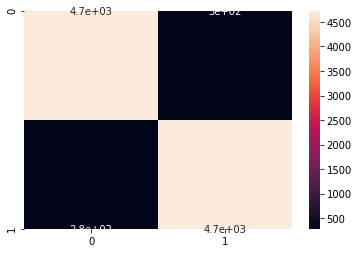

In [14]:
# 热力图呈现混淆矩阵
import seaborn as sns
sns.heatmap(confu_mat, annot=True)
plt.show()

# 计算F1值


In [5]:
f_sc = f1_score(y, pre_result)
f_sc

0.9419638397762461

# 绘制ROC曲线

No handles with labels found to put in legend.


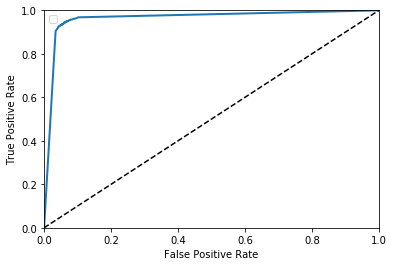

In [6]:
roc_fit(y, np.array(L.pi_list), threshold_num=2000)

# 绘制pr曲线

* 说明一下图形这么畸形的原因

  由于使用的是逻辑回归得出的概率作为分数去划分阈值，然而这个概率就是要要么很接近1要么很接近0，呈现反正态分布的形状，而阈值的划分采用的是分数中最大值和最小值按照指定的数量进行等分的，所以图形显得有点畸形。虽然可以改一下阈值划分使得图形变得好看一些，但那样函数有点不太通用，就只针对像这样的反正态分布的形状。

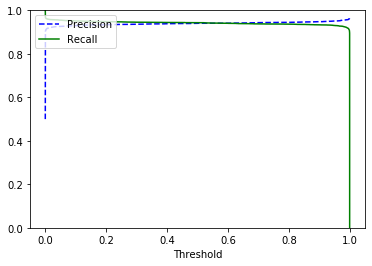

In [8]:
pr_curve(y, np.array(L.pi_list))